<a href="https://colab.research.google.com/github/cajohare/HowToMakeAPlot/blob/main/code/Charges.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Simple demonstration of how different colormaps can be used

In [1]:
from numpy import *
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.patheffects as pe
from mpl_toolkits.axes_grid1 import make_axes_locatable

plt.style.use('sty.mplstyle')

# Function that adds a colorbar to the plot without disrupting the existing plot
def cbar(mappable,extend='neither',minorticklength=8,majorticklength=10,\
            minortickwidth=2,majortickwidth=2.5,pad=0.1,side="top",orientation="horizontal",\
                labeltop=True,labelbottom=False,labelleft=False,labelright=True,tickpad=0):
    ax = mappable.axes
    fig = ax.figure
    divider = make_axes_locatable(ax)
    cax = divider.append_axes(side, size="5%", pad=pad)
    cbar = fig.colorbar(mappable, cax=cax,extend=extend,orientation=orientation)
    cbar.ax.tick_params(which='minor',length=minorticklength,width=minortickwidth,top=True,bottom=False,labeltop=labeltop,labelbottom=labelbottom,pad=tickpad)
    cbar.ax.tick_params(which='major',length=majorticklength,width=majortickwidth,top=True,bottom=False,labeltop=labeltop,labelbottom=labelbottom,pad=tickpad)
    cbar.solids.set_edgecolor("face")
    return cbar


In [20]:
import matplotlib.cm as cm
from numpy import *
from numpy import random

# Create data - electric field for a set of n randomly placed charges
n = 1024
dx = 2/n
x = linspace(-1, 1, n)
y = linspace(-1, 1, n)
X, Y = meshgrid(x, y)
Ex = zeros_like(X)
Ey = zeros_like(X)
nq = 30
q = ones((nq))
q[0:nq//2] = -1
x0 = (2*random.uniform(size=nq)-1)*0.9
y0 = (2*random.uniform(size=nq)-1)*0.9
for i in range(0,nq):
    Ex += q[i]*(X - x0[i])/hypot(X-x0[i], Y-y0[i])**3
    Ey += q[i]*(Y - y0[i])/hypot(X-x0[i], Y-y0[i])**3

E = sqrt(Ex**2 + Ey**2) # absolute E-field
divE = gradient(-Ex,axis=1)/dx + gradient(-Ey,axis=0)/dx # divergence

## Visualisation of the charges using the streamplot function

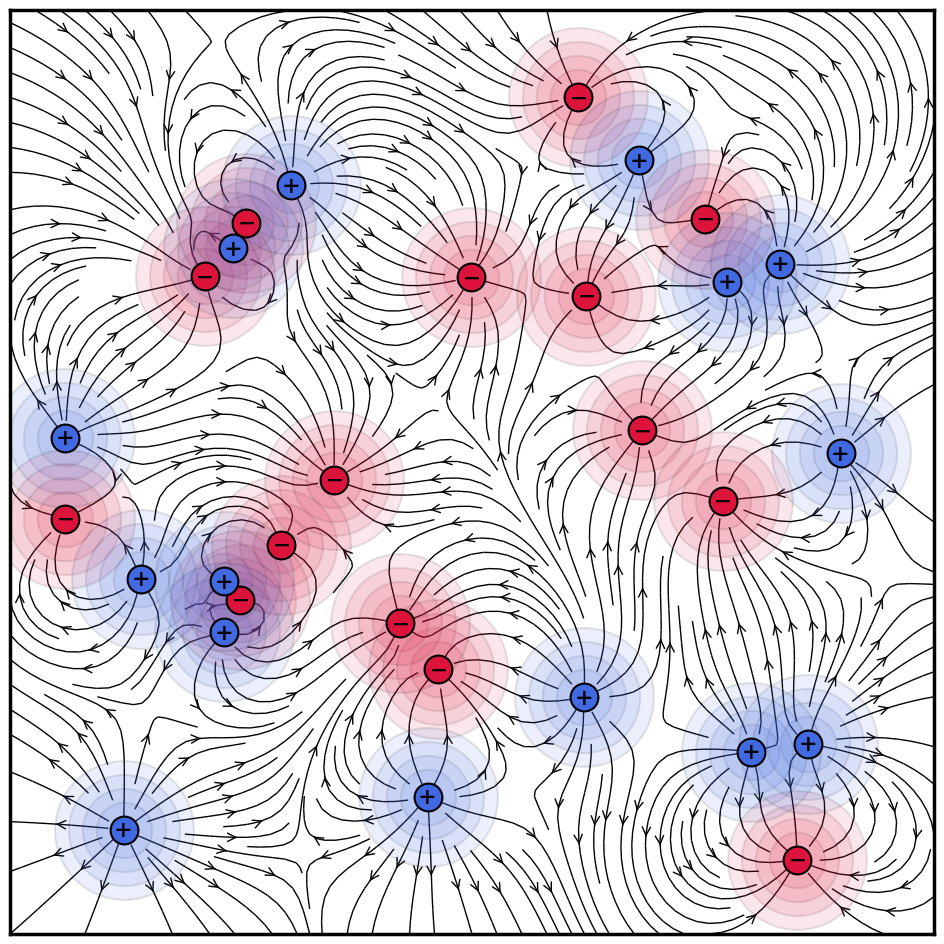

In [21]:
fig = plt.figure()
ax = fig.add_subplot()

plt.streamplot(x, y, Ex, Ey, linewidth=1,density=2.5, arrowstyle='->', arrowsize=1.5,color='k')

for sz in [1,2,3,4,5]:
    plt.plot(x0[q<0],y0[q<0],'o',mfc='crimson',markersize=20*sz,mec='k',mew=1.5,alpha=0.1)
    plt.plot(x0[q>00],y0[q>0],'o',mfc='royalblue',markersize=20*sz,mec='k',mew=1.5,alpha=0.1)
plt.plot(x0[q<0],y0[q<0],'o',mfc='crimson',markersize=20,mec='k',mew=1.5)
plt.plot(x0[q>00],y0[q>0],'o',mfc='royalblue',markersize=20,mec='k',mew=1.5)
for i in range(0,nq):
    if q[i]<0:
        plt.text(x0[i]+0.0015,y0[i]-0.0045,r'{\bf --}',va='center',ha='center',fontsize=20)
    else:
        plt.text(x0[i]+0.0025,y0[i]-0.003,r'{\bf +}',va='center',ha='center',fontsize=20)


ax.set_xlim(-1,1)
ax.set_ylim(-1,1)
ax.set_xticks([])
ax.set_yticks([])
ax.set_aspect('equal')

plt.savefig('../plots/Charges.pdf',transparent=False,bbox_inches='tight')
plt.savefig('../plots/plots_png/Charges.png',transparent=False,bbox_inches='tight')

# Cyclic colormap for angular information

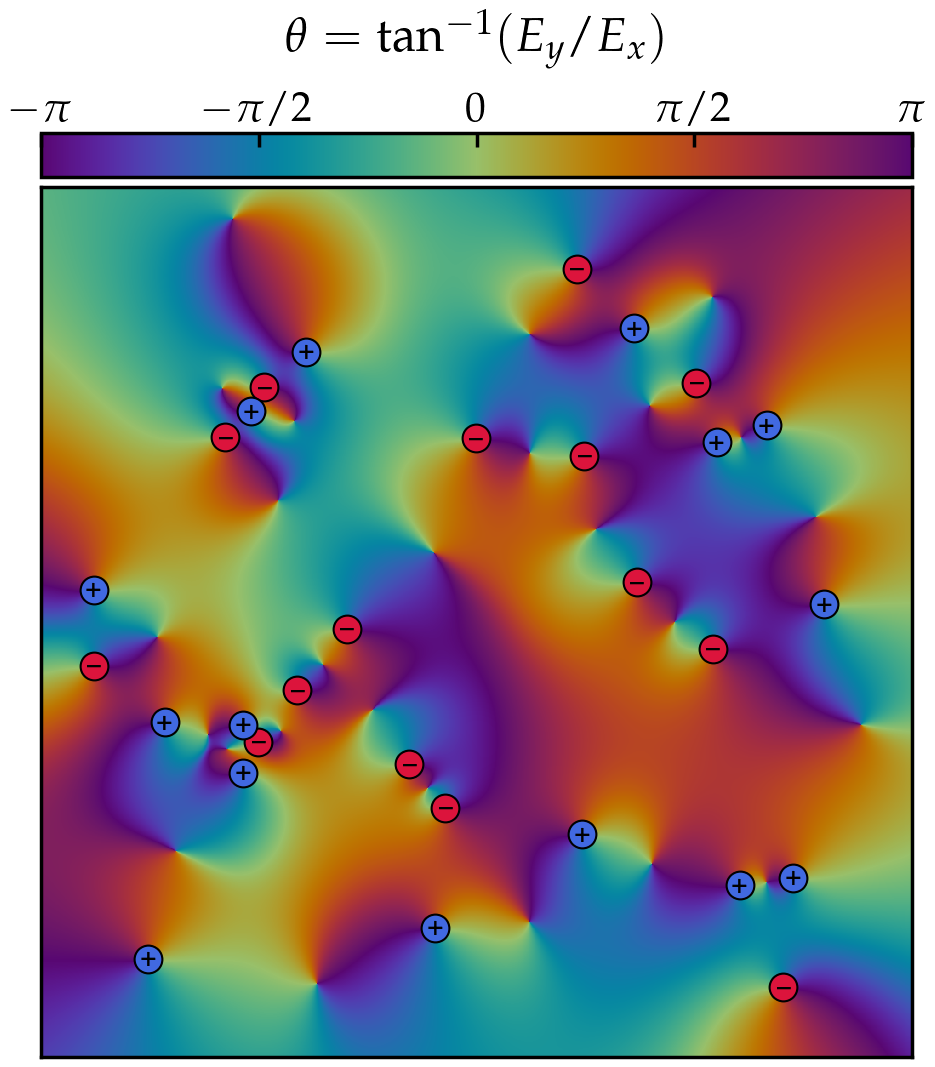

In [22]:
import cmasher as cmr

fig = plt.figure()
ax = fig.add_subplot()

theta = arctan2(Ey,Ex)
theta[abs((abs(theta)-pi))<0.05] = nan
im = plt.pcolormesh(x, y, arctan2(Ey,Ex),cmap=cmr.infinity,vmin=-pi,vmax=pi,rasterized=True)
#plt.contour(x, y, theta ,levels=arange(-pi,pi+0.1,0.1),linewidths=0.5,colors='k',linestyles='-')

im.set_edgecolor('face') # <--- Need this otherwise you get artefacts appearing between each pixels

plt.plot(x0[q<0],y0[q<0],'o',mfc='crimson',markersize=20,mec='k',mew=1.5)
plt.plot(x0[q>00],y0[q>0],'o',mfc='royalblue',markersize=20,mec='k',mew=1.5)

for i in range(0,nq):
    if q[i]<0:
        plt.text(x0[i]+0.0015,y0[i]-0.0045,r'{\bf --}',va='center',ha='center',fontsize=20)
    else:
        plt.text(x0[i]+0.0025,y0[i]-0.003,r'{\bf +}',va='center',ha='center',fontsize=20)

ax.set_xlim(-1,1)
ax.set_ylim(-1,1)
ax.set_xticks([])
ax.set_yticks([])
ax.set_aspect('equal')

cb = cbar(im)
cb.set_ticks([-pi,-pi/2,0,pi/2,pi])
cb.set_ticklabels([r'$-\pi$',r'$-\pi/2$',r'0',r'$\pi/2$',r'$\pi$'])
cb.set_label(r'$\theta = \tan^{-1}(E_y/E_x)$',labelpad=-120,fontsize=35)

plt.savefig('../plots/Colormaps_Cyclic.pdf',transparent=False,bbox_inches='tight')
plt.savefig('../plots/plots_png/Colormaps_Cyclic.png',transparent=False,bbox_inches='tight')

# Diverging colormap for divergence

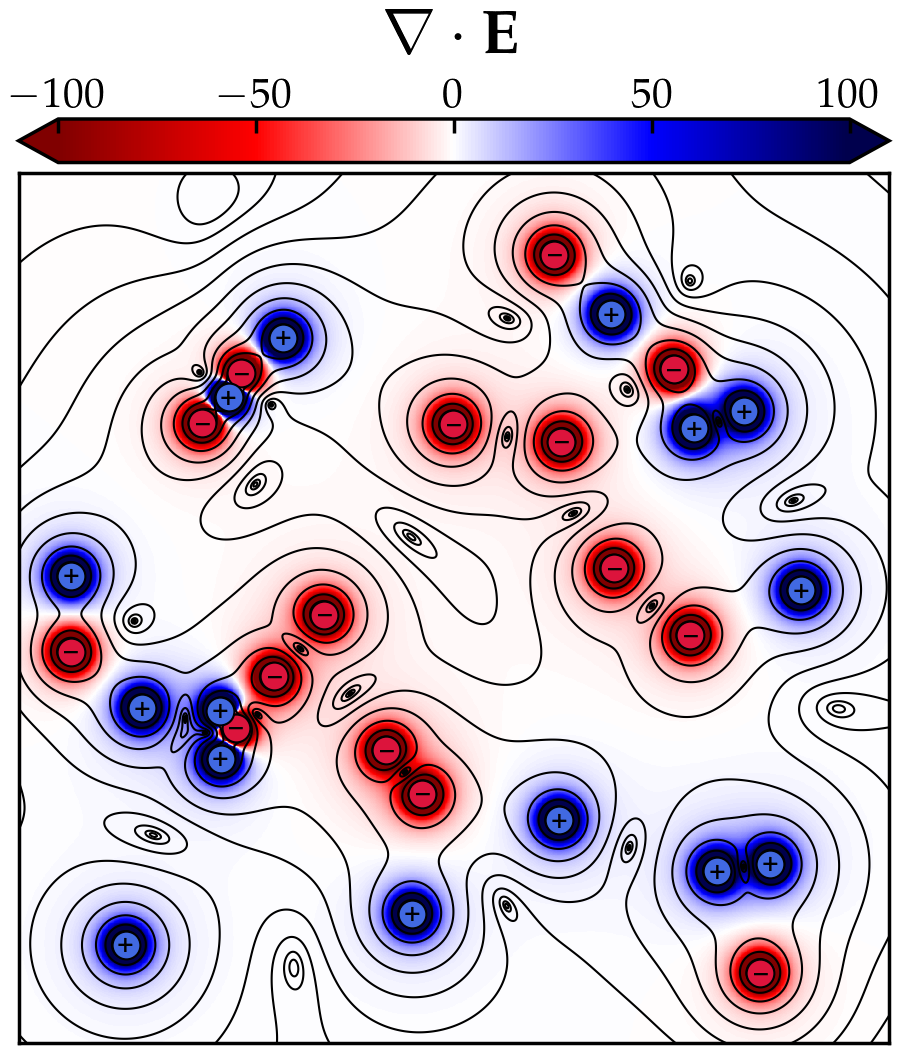

In [23]:
fig = plt.figure()
ax = fig.add_subplot()


im = plt.pcolormesh(x, y, divE/100,cmap=cm.seismic_r,vmin=-1e2,vmax=1e2,rasterized=True)

plt.contour(x, y, E,levels=logspace(0,3,10),linewidths=1.5,colors='k',linestyles='-')

plt.plot(x0[q<0],y0[q<0],'o',mfc='crimson',markersize=20,mec='k',mew=1.5)
plt.plot(x0[q>00],y0[q>0],'o',mfc='royalblue',markersize=20,mec='k',mew=1.5)
for i in range(0,nq):
    if q[i]<0:
        plt.text(x0[i]+0.0015,y0[i]-0.0045,r'{\bf --}',va='center',ha='center',fontsize=20)
    else:
        plt.text(x0[i]+0.0025,y0[i]-0.003,r'{\bf +}',va='center',ha='center',fontsize=20)

ax.set_xlim(-1,1)
ax.set_ylim(-1,1)
ax.set_xticks([])
ax.set_yticks([])
ax.set_aspect('equal')

cb = cbar(im,extend='both')
cb.set_label(r'$\nabla \cdot \mathbf{E}$',labelpad=-110)

plt.savefig('../plots/Colormaps_Diverging.pdf',transparent=False,bbox_inches='tight')
plt.savefig('../plots/plots_png/Colormaps_Diverging.png',transparent=False,bbox_inches='tight')

# Sequential colormap for sequential data (electric field strength)

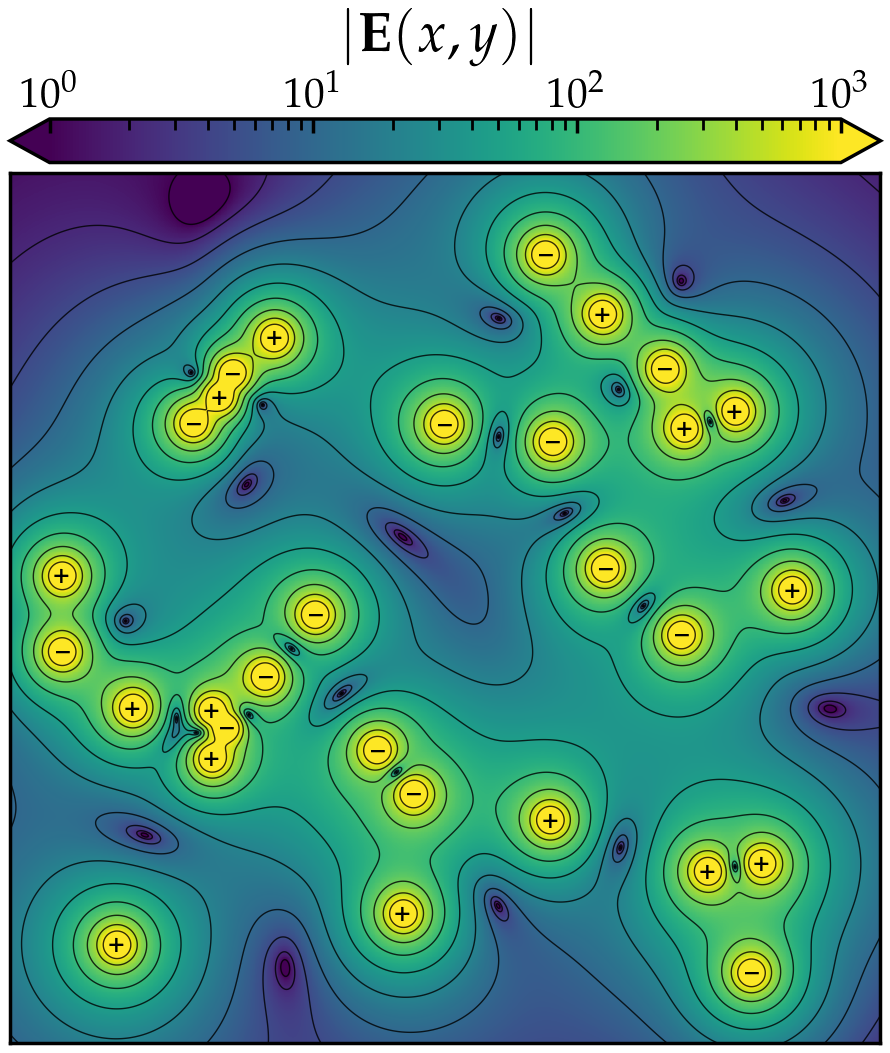

In [24]:
from matplotlib import colors

fig = plt.figure()
ax = fig.add_subplot()

im = plt.pcolormesh(x, y, E,cmap=cm.viridis,norm=colors.LogNorm(vmin=1e0,vmax=1e3),rasterized=True)
plt.contour(x, y, E,levels=logspace(0,3,10),linewidths=1,colors='k',linestyles='-',alpha=0.8)

for i in range(0,nq):
    if q[i]<0:
        plt.text(x0[i]+0.0009,y0[i]-0.004,r'{\bf --}',va='center',ha='center',fontsize=20)
    else:
        plt.text(x0[i]+0.001,y0[i]-0.003,r'{\bf +}',va='center',ha='center',fontsize=20)

ax.set_xlim(-1,1)
ax.set_ylim(-1,1)
ax.set_xticks([])
ax.set_yticks([])
ax.set_aspect('equal')

cb = cbar(im,extend='both')
cb.set_label(r'$|\mathbf{E}(x,y)|$',labelpad=-110,fontsize=40)

plt.savefig('../plots/Colormaps_Sequential.pdf',transparent=False,bbox_inches='tight')
plt.savefig('../plots/plots_png/Colormaps_Sequential.png',transparent=False,bbox_inches='tight')